# 🌲 Forest Cover Type Classification
---
**Internship Task 3 (Elevvo Pathways)**

**Objective:** Predict forest cover type from cartographic & environmental features using Random Forest and XGBoost.

**Topics Covered:** Multi-class classification | Tree-based models | Hyperparameter tuning

## 1. Load Required Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


## 2. Load Dataset

In [2]:

df_path = '../data/sample_covtype.csv'

col_names = [
    'Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3',
    'Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6',
    'Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13',
    'Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
    'Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27',
    'Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34',
    'Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type'
]

df = pd.read_csv(df_path, header=None, names=col_names)
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## 3. Data Exploration

In [3]:

df.info()
df.describe()
print("Missing values per column:")
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

## 4. Target Distribution

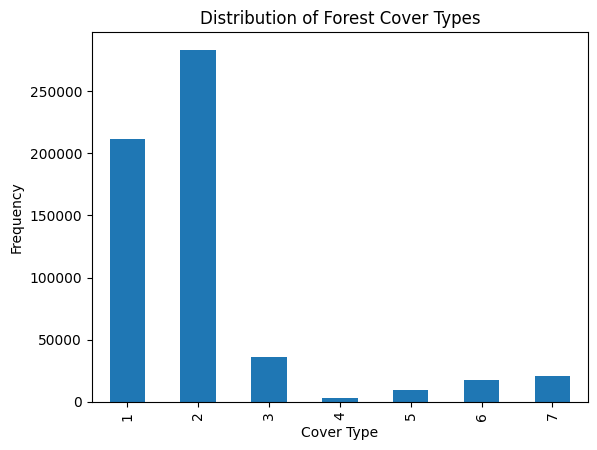

In [4]:

df['Cover_Type'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Frequency')

plt.savefig('../visuals/distribution_cover_types.png', dpi=300)
plt.show()


## 5. Feature Correlation

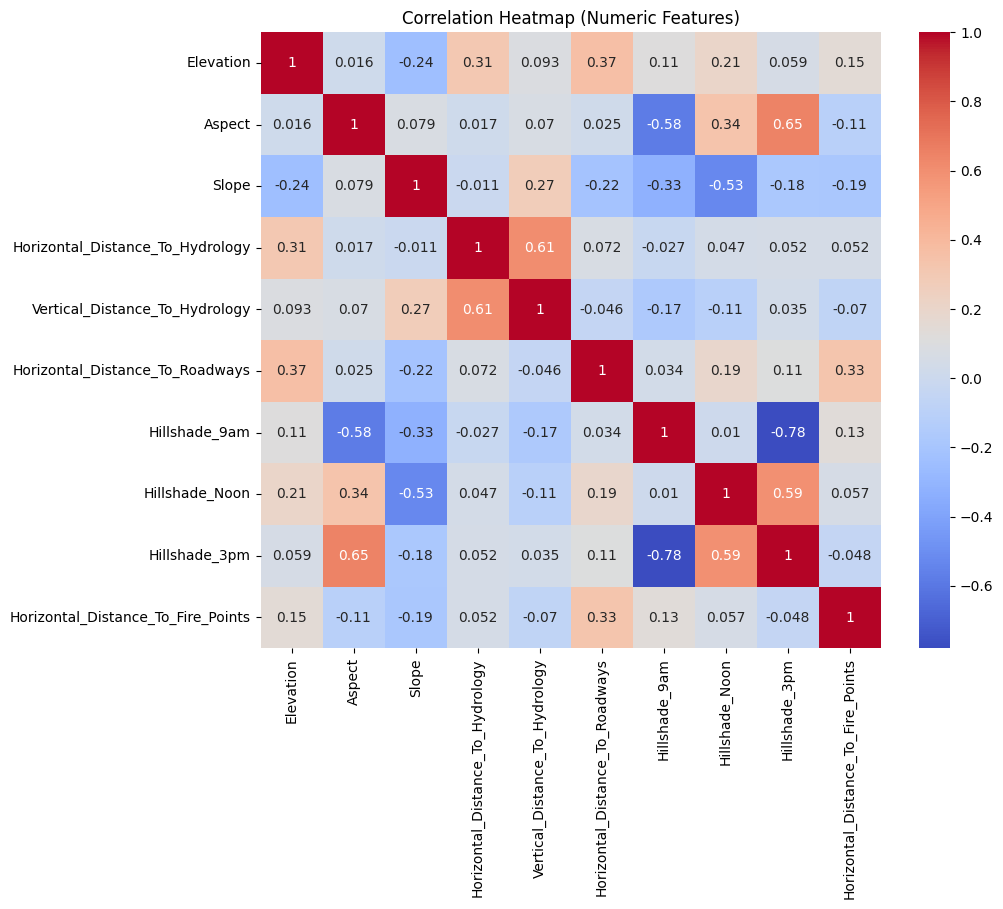

In [5]:

numeric_features = df.iloc[:, :10]
corr_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')

plt.savefig('../visuals/corr_heatmap.png', dpi=300)
plt.show()


## 6. Train/Test Split

In [6]:

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type'] - 1  # Convert labels 1-7 → 0-6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 7. Model 1: Random Forest

In [7]:

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.1s


Random Forest Accuracy: 0.9533


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.5s finished


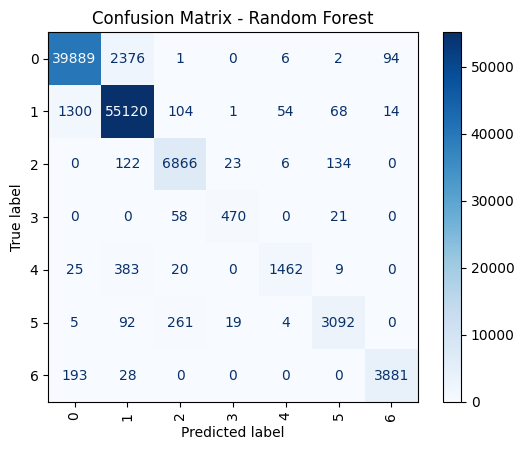

C:\Users\Acer\AppData\Local\Temp\ipykernel_5548\988486087.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')


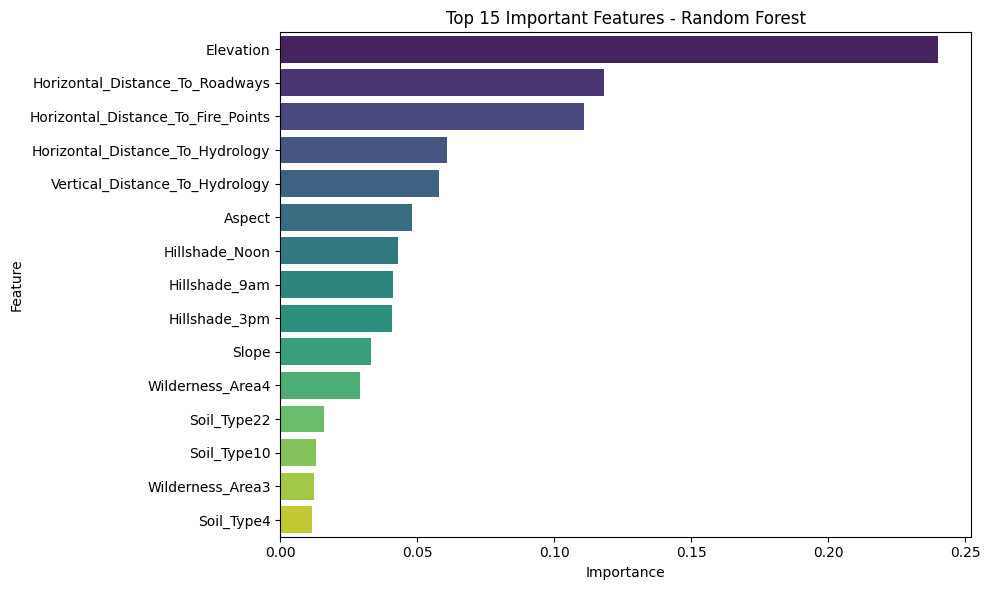

In [8]:

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=clf_rf.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.savefig('../visuals/confusion_matrix_rf.png', dpi=300)
plt.show()

importances = clf_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Important Features - Random Forest")
plt.tight_layout()
plt.savefig('../visuals/feature_importance_rf.png', dpi=300)
plt.show()


## 8. Model 2: XGBoost

In [9]:

clf_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
    verbosity=1
)
clf_xgb.fit(X_train, y_train)

y_pred_xgb = clf_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


d:\x3loox\University\Python\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:19:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8696


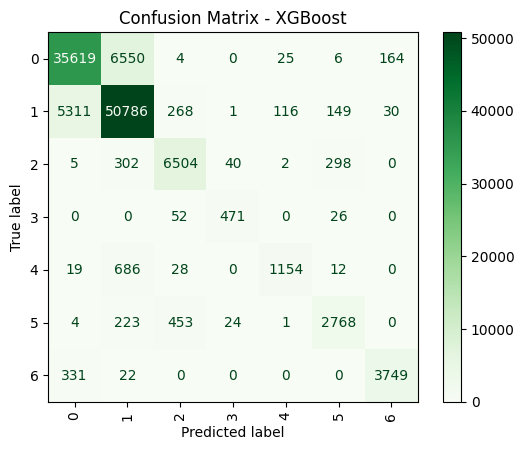

C:\Users\Acer\AppData\Local\Temp\ipykernel_5548\3605142226.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_imp_df.head(15), x='Importance', y='Feature', palette='rocket')


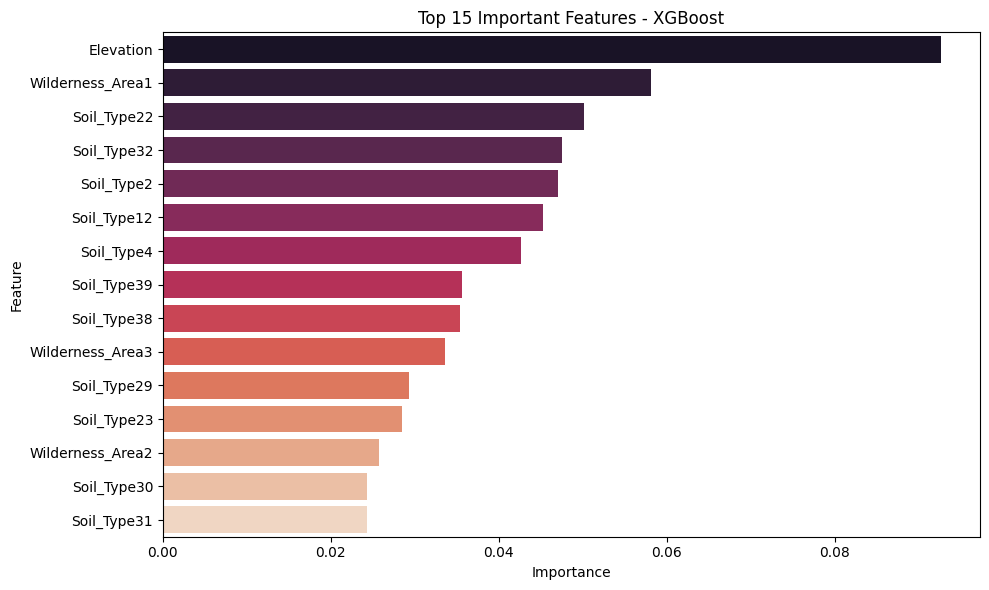

In [10]:

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=clf_xgb.classes_)
disp.plot(cmap='Greens', xticks_rotation='vertical', values_format='d')
plt.title("Confusion Matrix - XGBoost")
plt.savefig('../visuals/confusion_matrix_xgb.png', dpi=300)
plt.show()

xgb_importances = clf_xgb.feature_importances_
xgb_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_imp_df.head(15), x='Importance', y='Feature', palette='rocket')
plt.title("Top 15 Important Features - XGBoost")
plt.tight_layout()
plt.savefig('../visuals/feature_importance_xgb.png', dpi=300)
plt.show()


## 9. Model Comparison

In [11]:

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


Random Forest Accuracy: 0.9533
XGBoost Accuracy: 0.8696


## 10. Bonus: Hyperparameter Tuning

In [12]:

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                       param_grid=param_grid_rf, cv=3, scoring='accuracy',
                       verbose=2, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best RF Score on Train Set:", grid_rf.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RF Score on Train Set: 0.9468405306493852


In [13]:

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 1],
}

xgb_clf = XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1,
    random_state=42
)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf, param_distributions=param_dist_xgb, n_iter=20,
    scoring='accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1
)
random_search_xgb.fit(X_train, y_train)

print("Best XGBoost Parameters:", random_search_xgb.best_params_)
print("Best XGB Score on Train Set:", random_search_xgb.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


d:\x3loox\University\Python\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:55:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Best XGB Score on Train Set: 0.9538261954421113


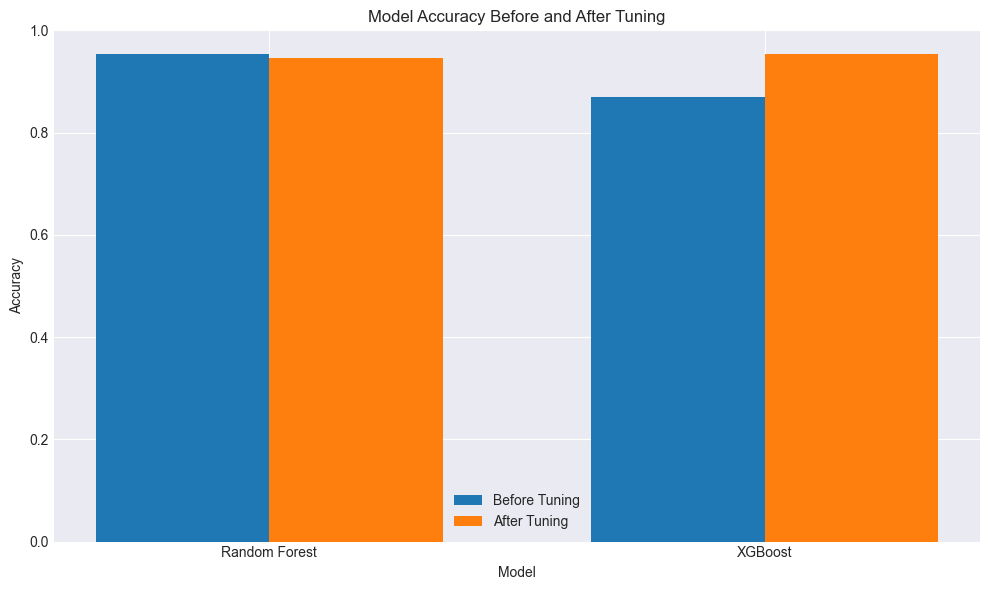

In [14]:

model_com = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy (Before Tuning)': [accuracy_rf, accuracy_xgb],
    'Accuracy (After Tuning)': [grid_rf.best_score_, random_search_xgb.best_score_]
})

# Set the style
plt.style.use('seaborn-v0_8-darkgrid')

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(model_com))

bars1 = plt.bar(index, model_com['Accuracy (Before Tuning)'], bar_width, label='Before Tuning')
bars2 = plt.bar([i + bar_width for i in index], model_com['Accuracy (After Tuning)'], bar_width, label='After Tuning')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Before and After Tuning')
plt.xticks([i + bar_width / 2 for i in index], model_com['Model'])
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.legend()
plt.tight_layout()
plt.savefig('../visuals/model_comparison.png', dpi=300)
plt.show()